# 회귀분석

## Linear Discriminant Analysis
## Logistic Regression

In [6]:
suppressMessages({
    library(MASS)
    library(mlbench)
})
data(Sonar) #데이터
set.seed(1)
maxiter=100
n=nrow(Sonar)
err.lda=err.log=rep(0,maxiter)
for(i in 1:maxiter) {
    suppressWarnings(
        {
            idx=sample(1:n,size=floor(2*n/3),replace=TRUE)
            Sonar.tr=Sonar[idx,] #학습 데이터
            Sonar.te=Sonar[-idx,] #검증 데이터
            #LDA
            fit1=lda(Class~.,Sonar.tr)
            pred=predict(fit1,Sonar.te)$class
            err.lda[i]=mean(Sonar.te$Class != pred) #test error rate
            #logit
            fit2=glm(Class~.,Sonar.tr,family=binomial())
            prob=predict(fit2,Sonar.te,type='response')
            p.class=ifelse(prob>0.5,'R','M')
            err.log[i]=mean(Sonar.te$Class!=p.class) #test error rate
        }
    )

}
cat("Linear discriminant:",mean(err.lda),sd(err.lda)/sqrt(maxiter),'\n')
cat("Logistic regression:",mean(err.log),sd(err.log)/sqrt(maxiter),"\n")

Linear discriminant: 0.3201349 0.004171742 
Logistic regression: 0.3415502 0.004689805 


# 의사결정 나무

In [65]:
library(MASS)
suppressWarnings(library(tree))
data(iris)
ir.tr=tree(Species~.,iris)
summary(ir.tr)


Classification tree:
tree(formula = Species ~ ., data = iris)
Variables actually used in tree construction:
[1] "Petal.Length" "Petal.Width"  "Sepal.Length"
Number of terminal nodes:  6 
Residual mean deviance:  0.1253 = 18.05 / 144 
Misclassification error rate: 0.02667 = 4 / 150 

In [66]:
ir.tr

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 150 329.600 setosa ( 0.33333 0.33333 0.33333 )  
   2) Petal.Length < 2.45 50   0.000 setosa ( 1.00000 0.00000 0.00000 ) *
   3) Petal.Length > 2.45 100 138.600 versicolor ( 0.00000 0.50000 0.50000 )  
     6) Petal.Width < 1.75 54  33.320 versicolor ( 0.00000 0.90741 0.09259 )  
      12) Petal.Length < 4.95 48   9.721 versicolor ( 0.00000 0.97917 0.02083 )  
        24) Sepal.Length < 5.15 5   5.004 versicolor ( 0.00000 0.80000 0.20000 ) *
        25) Sepal.Length > 5.15 43   0.000 versicolor ( 0.00000 1.00000 0.00000 ) *
      13) Petal.Length > 4.95 6   7.638 virginica ( 0.00000 0.33333 0.66667 ) *
     7) Petal.Width > 1.75 46   9.635 virginica ( 0.00000 0.02174 0.97826 )  
      14) Petal.Length < 4.95 6   5.407 virginica ( 0.00000 0.16667 0.83333 ) *
      15) Petal.Length > 4.95 40   0.000 virginica ( 0.00000 0.00000 1.00000 ) *

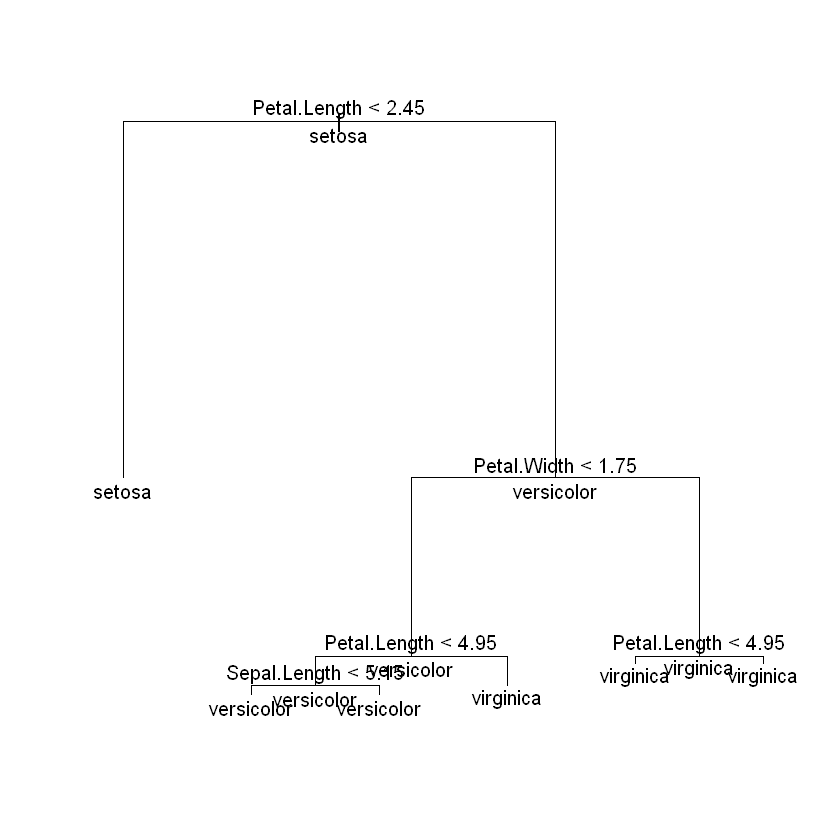

In [68]:
plot(ir.tr)
text(ir.tr,all=TRUE)

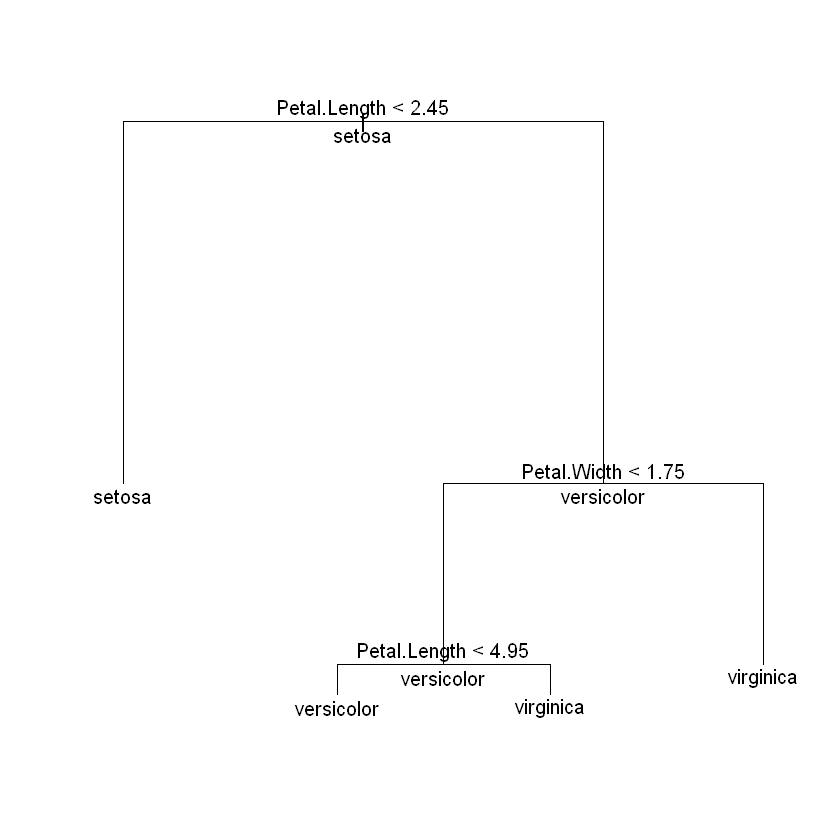

In [69]:
ir.tr1=snip.tree(ir.tr,nodes=c(12,7))
plot(ir.tr1); text(ir.tr1,all=TRUE)

# 신경망

In [71]:
data(iris)
library(nnet)
samp=c(sample(1:50,25),sample(51:100,25),sample(101:150,25))
iris.tr=iris[samp,]
iris.te=iris[-samp,]
ir1=nnet(Species~.,data=iris.tr,size=2,decay=0.00004)


Warning message:
"package 'nnet' was built under R version 3.6.3"

# weights:  19
initial  value 82.495138 
iter  10 value 34.941507
iter  20 value 34.686433
iter  30 value 34.685651
iter  40 value 34.682109
iter  50 value 34.680797
iter  60 value 34.615480
iter  70 value 21.570455
iter  80 value 7.830205
iter  90 value 4.842510
iter 100 value 4.826724
final  value 4.826724 
stopped after 100 iterations


In [72]:
summary(ir1)

a 4-2-3 network with 19 weights
options were - softmax modelling  decay=4e-05
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 
 -0.09  -1.90  -0.41  -3.47  -0.93 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 
 -2.76  -0.14  -1.06   0.94   1.90 
 b->o1 h1->o1 h2->o1 
 14.42  -4.52 -39.53 
 b->o2 h1->o2 h2->o2 
  6.98   2.03   0.45 
 b->o3 h1->o3 h2->o3 
-22.04   2.75  38.74 

In [77]:
y=iris.te$Species
p=predict(ir1,iris.te,type='class')

In [78]:
table(y,p)

            p
y            setosa versicolor virginica
  setosa         25          0         0
  versicolor      0         23         2
  virginica       0          0        25

# Naive Bayes

In [82]:
suppressWarnings({
    library(e1071)
    library(mlbench)
})
data(HouseVotes84)
str(HouseVotes84)

'data.frame':	435 obs. of  17 variables:
 $ Class: Factor w/ 2 levels "democrat","republican": 2 2 1 1 1 1 1 2 2 1 ...
 $ V1   : Factor w/ 2 levels "n","y": 1 1 NA 1 2 1 1 1 1 2 ...
 $ V2   : Factor w/ 2 levels "n","y": 2 2 2 2 2 2 2 2 2 2 ...
 $ V3   : Factor w/ 2 levels "n","y": 1 1 2 2 2 2 1 1 1 2 ...
 $ V4   : Factor w/ 2 levels "n","y": 2 2 NA 1 1 1 2 2 2 1 ...
 $ V5   : Factor w/ 2 levels "n","y": 2 2 2 NA 2 2 2 2 2 1 ...
 $ V6   : Factor w/ 2 levels "n","y": 2 2 2 2 2 2 2 2 2 1 ...
 $ V7   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 2 ...
 $ V8   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 2 ...
 $ V9   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 2 ...
 $ V10  : Factor w/ 2 levels "n","y": 2 1 1 1 1 1 1 1 1 1 ...
 $ V11  : Factor w/ 2 levels "n","y": NA 1 2 2 2 1 1 1 1 1 ...
 $ V12  : Factor w/ 2 levels "n","y": 2 2 1 1 NA 1 1 1 2 1 ...
 $ V13  : Factor w/ 2 levels "n","y": 2 2 2 2 2 2 NA 2 2 1 ...
 $ V14  : Factor w/ 2 levels "n","y": 2 2 2 1 2 2 2 2 2 1 ...
 $ V15 

In [83]:
fit=naiveBayes(Class~.,data=HouseVotes84)
predict(fit,HouseVotes84[1:10,-1])

[1] republican republican republican democrat   democrat   democrat  
 [7] republican republican republican democrat  
Levels: democrat republican

In [85]:
round(predict(fit,HouseVotes84[1:10,-1],type='raw'),4)

democrat,republican
0.0000,1.0000
0.0000,1.0000
0.0057,0.9943
0.9986,0.0014
0.9667,0.0333
0.8121,0.1879
0.0002,0.9998
0.0000,1.0000
0.0000,1.0000
1.0000,0.0000


In [88]:
pred=predict(fit,HouseVotes84[,-1])
table(pred,HouseVotes84[,1])

            
pred         democrat republican
  democrat        238         13
  republican       29        155

In [89]:
suppressWarnings({
    library(naivebayes)
})

In [90]:
fit=naive_bayes(Class~.,data=HouseVotes84)

In [91]:
summary(fit)


================================== Naive Bayes ================================== 
 
- Call: naive_bayes.formula(formula = Class ~ ., data = HouseVotes84) 
- Laplace: 0 
- Classes: 2 
- Samples: 435 
- Features: 16 
- Conditional distributions: 
    - Bernoulli: 16
- Prior probabilities: 
    - democrat: 0.6138
    - republican: 0.3862

--------------------------------------------------------------------------------- 


In [92]:
pred=predict(fit,HouseVotes84[,-1])

In [93]:
table(pred,HouseVotes84[,1])

            
pred         democrat republican
  democrat        238         13
  republican       29        155

In [96]:
predict(fit,HouseVotes84[1:10,-1],type='prob')

democrat,republican
1.029209e-07,9.999999e-01
5.820415e-08,9.999999e-01
5.684937e-03,9.943151e-01
9.985798e-01,1.420152e-03
9.666720e-01,3.332802e-02
8.121430e-01,1.878570e-01
1.751512e-04,9.998248e-01
8.300100e-06,9.999917e-01
8.277705e-08,9.999999e-01
1.000000e+00,5.029425e-11


# KNN

In [97]:
library(class)

In [98]:
data(iris)
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [99]:
set.seed(1)
y=iris[,5]
idx=sample(nrow(iris),75,replace=FALSE)

In [100]:
tr=iris[idx,]
te=iris[-idx,]

In [101]:
x.tr=tr[,-5]
y.tr=tr[,5]
x.te=te[,-5]
y.te=te[,5]

In [102]:
fit=knn(x.tr,#train data
        x.te, #test data(neighbors)
        y.tr, #train label
        k=3) #k=3, output=test label

In [103]:
fit

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     setosa     setosa     setosa    
[19] setosa     setosa     setosa     setosa     versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] versicolor versicolor versicolor versicolor versicolor versicolor
[37] versicolor versicolor versicolor versicolor versicolor versicolor
[43] versicolor versicolor versicolor versicolor versicolor versicolor
[49] versicolor versicolor versicolor versicolor virginica  virginica 
[55] versicolor virginica  virginica  virginica  virginica  virginica 
[61] virginica  virginica  virginica  virginica  virginica  virginica 
[67] virginica  virginica  virginica  virginica  versicolor virginica 
[73] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [104]:
table(fit,y.te)

            y.te
fit          setosa versicolor virginica
  setosa         22          0         0
  versicolor      0         30         2
  virginica       0          0        21

# ARULES

In [105]:
suppressMessages(suppressWarnings({
    library(arules)
}))

In [106]:
#convert transaction into a list
a_list=list(
    c('a','b','c'),
    c('a','b'),
    c('a','b','d'),
    c('c','e'),
    c('a','b','d','e')
)

In [107]:
str(a_list)

List of 5
 $ : chr [1:3] "a" "b" "c"
 $ : chr [1:2] "a" "b"
 $ : chr [1:3] "a" "b" "d"
 $ : chr [1:2] "c" "e"
 $ : chr [1:4] "a" "b" "d" "e"


In [108]:
#set transaction name
names(a_list)=paste("Tr",c(1:5),sep="")

In [109]:
str(a_list)

List of 5
 $ Tr1: chr [1:3] "a" "b" "c"
 $ Tr2: chr [1:2] "a" "b"
 $ Tr3: chr [1:3] "a" "b" "d"
 $ Tr4: chr [1:2] "c" "e"
 $ Tr5: chr [1:4] "a" "b" "d" "e"


In [110]:
#coerce into transactions
trans=as(a_list,"transactions")

In [111]:
#analyze
summary(trans)

transactions as itemMatrix in sparse format with
 5 rows (elements/itemsets/transactions) and
 5 columns (items) and a density of 0.56 

most frequent items:
      a       b       c       d       e (Other) 
      4       4       2       2       2       0 

element (itemset/transaction) length distribution:
sizes
2 3 4 
2 2 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     2.0     3.0     2.8     3.0     4.0 

includes extended item information - examples:
  labels
1      a
2      b
3      c

includes extended transaction information - examples:
  transactionID
1           Tr1
2           Tr2
3           Tr3

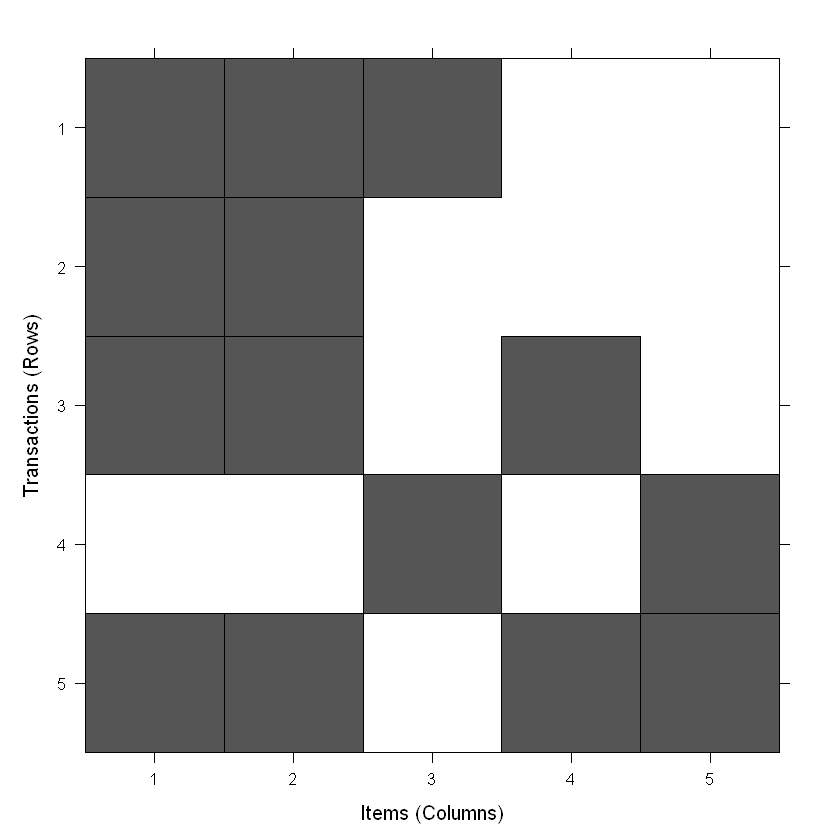

In [112]:
image(trans)

In [116]:
#create a transaction from a matrix
a_matrix=matrix(c(
    1,1,1,0,0,
    1,1,0,0,0,
    1,1,0,1,0,
    0,0,1,0,1,
    1,1,0,1,1),ncol=5
)

In [117]:
dimnames(a_matrix)=list(c('a','b','c','d','e'),paste("Tr",c(1:5),sep=""))

In [118]:
a_matrix

,Tr1,Tr2,Tr3,Tr4,Tr5
a,1,1,1,0,1
b,1,1,1,0,1
c,1,0,0,1,0
d,0,0,1,0,1
e,0,0,0,1,1


In [119]:
trans2=as(a_matrix,"transactions")

In [121]:
#create transactions from data.frame
a_data.frame=data.frame(
    age=as.factor(c(6,8,7,6,9,5)),
    grade=as.factor(c(1,3,1,1,4,1))
)

In [122]:
str(a_data.frame)

'data.frame':	6 obs. of  2 variables:
 $ age  : Factor w/ 5 levels "5","6","7","8",..: 2 4 3 2 5 1
 $ grade: Factor w/ 3 levels "1","3","4": 1 2 1 1 3 1


In [123]:
trans3=as(a_data.frame,'transactions')

In [125]:
summary(trans3)

transactions as itemMatrix in sparse format with
 6 rows (elements/itemsets/transactions) and
 8 columns (items) and a density of 0.25 

most frequent items:
grade=1   age=6   age=5   age=7   age=8 (Other) 
      4       2       1       1       1       3 

element (itemset/transaction) length distribution:
sizes
2 
6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

includes extended item information - examples:
  labels variables levels
1  age=5       age      5
2  age=6       age      6
3  age=7       age      7

includes extended transaction information - examples:
  transactionID
1             1
2             2
3             3

In [126]:
as(trans3,"data.frame")

items,transactionID
"{age=6,grade=1}",1
"{age=8,grade=3}",2
"{age=7,grade=1}",3
"{age=6,grade=1}",4
"{age=9,grade=4}",5
"{age=5,grade=1}",6


In [127]:
data(Adult)

In [128]:
str(Adult)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:612200] 1 10 25 32 35 50 59 61 63 65 ...
  .. .. ..@ p       : int [1:48843] 0 13 26 39 52 65 78 91 104 117 ...
  .. .. ..@ Dim     : int [1:2] 115 48842
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	115 obs. of  3 variables:
  .. ..$ labels   : chr [1:115] "age=Young" "age=Middle-aged" "age=Senior" "age=Old" ...
  .. ..$ variables: Factor w/ 13 levels "age","capital-gain",..: 1 1 1 1 13 13 13 13 13 13 ...
  .. ..$ levels   : Factor w/ 112 levels "10th","11th",..: 111 63 92 69 30 54 65 82 90 91 ...
  ..@ itemsetInfo:'data.frame':	48842 obs. of  1 variable:
  .. ..$ transactionID: chr [1:48842] "1" "2" "3" "4" ...


In [130]:
rules=apriori(Adult,
             parameter=list(
                     supp=0.5,
                     conf=0.9,
                     target='rules'
                 )
             )

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 24421 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[115 item(s), 48842 transaction(s)] done [0.06s].
sorting and recoding items ... [9 item(s)] done [0.01s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [52 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [131]:
summary(rules)

set of 52 rules

rule length distribution (lhs + rhs):sizes
 1  2  3  4 
 2 13 24 13 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.923   3.250   4.000 

summary of quality measures:
    support         confidence          lift            count      
 Min.   :0.5084   Min.   :0.9031   Min.   :0.9844   Min.   :24832  
 1st Qu.:0.5415   1st Qu.:0.9155   1st Qu.:0.9937   1st Qu.:26447  
 Median :0.5974   Median :0.9229   Median :0.9997   Median :29178  
 Mean   :0.6436   Mean   :0.9308   Mean   :1.0036   Mean   :31433  
 3rd Qu.:0.7426   3rd Qu.:0.9494   3rd Qu.:1.0057   3rd Qu.:36269  
 Max.   :0.9533   Max.   :0.9583   Max.   :1.0586   Max.   :46560  

mining info:
  data ntransactions support confidence
 Adult         48842     0.5        0.9

In [136]:
rules=apriori(Adult,parameter=list(support=0.4))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.4      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19536 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[115 item(s), 48842 transaction(s)] done [0.06s].
sorting and recoding items ... [11 item(s)] done [0.01s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [169 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [137]:
rules.sub=subset(rules,subset=rhs %pin% "sex" & lift > 1.3)
#pin any
#oin only
#ain all
#lhs rhs both items

In [138]:
rules.sub

set of 3 rules 

In [139]:
inspect(rules.sub)

    lhs                                    rhs          support confidence     lift count
[1] {relationship=Husband}              => {sex=Male} 0.4036485  0.9999493 1.495851 19715
[2] {marital-status=Married-civ-spouse} => {sex=Male} 0.4074157  0.8891818 1.330151 19899
[3] {marital-status=Married-civ-spouse,                                                  
     relationship=Husband}              => {sex=Male} 0.4034028  0.9999492 1.495851 19703


In [168]:
rules.sub=subset(rules,subset=items %pin% "Husband" & rhs %pin% "sex")

In [169]:
inspect(rules.sub)

    lhs                                    rhs          support confidence     lift count
[1] {relationship=Husband}              => {sex=Male} 0.4036485  0.9999493 1.495851 19715
[2] {marital-status=Married-civ-spouse,                                                  
     relationship=Husband}              => {sex=Male} 0.4034028  0.9999492 1.495851 19703


# 군집분석

## Distances

In [173]:
x=matrix(rnorm(100),nrow=5)

In [174]:
dist(x) #euclidean

         1        2        3        4
2 7.469565                           
3 5.717330 6.407709                  
4 5.371346 6.106838 5.057519         
5 6.029762 6.256703 4.685266 5.452838

In [175]:
dist(x,method='manhattan')

         1        2        3        4
2 28.00886                           
3 18.96064 23.54549                  
4 20.15608 20.63371 19.23071         
5 21.64728 21.24013 16.27446 18.51150

In [176]:
x=c(0,0,1,1,1,1)
y=c(1,0,1,1,0,1)
dist(rbind(x,y),method='binary')

    x
y 0.4

## 계층적 군집분석

In [177]:
x=matrix(rnorm(100),nrow=5)
dist(x)

         1        2        3        4
2 7.164656                           
3 6.373832 6.207892                  
4 6.576780 6.786923 6.820595         
5 6.543814 7.328360 6.377718 6.520681

In [179]:
h<-hclust(dist(x),method='single')
#plot(h)

In [181]:
h<-hclust(dist(x),method='complete')

In [182]:
h<-hclust(dist(x),method='average')

In [185]:
h<-hclust(dist(x),method='centroid')
#plot(h,hang=-1)

## K-means 

In [186]:
x<-rbind(matrix(rnorm(100,sd=0.3),ncol=2),
        matrix(rnorm(100,mean=1,sd=0.3),ncol=2))

In [187]:
colnames(x)=c('x','y')

In [188]:
cl=kmeans(x,2)

In [189]:
cl

K-means clustering with 2 clusters of sizes 51, 49

Cluster means:
           x          y
1 0.03411006 0.01124226
2 0.98126964 1.01997649

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2

Within cluster sum of squares by cluster:
[1]  9.175297 11.240831
 (between_SS / total_SS =  70.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [190]:
str(cl)

List of 9
 $ cluster     : int [1:100] 1 1 1 1 1 1 1 1 1 1 ...
 $ centers     : num [1:2, 1:2] 0.0341 0.9813 0.0112 1.02
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:2] "x" "y"
 $ totss       : num 68.3
 $ withinss    : num [1:2] 9.18 11.24
 $ tot.withinss: num 20.4
 $ betweenss   : num 47.8
 $ size        : int [1:2] 51 49
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


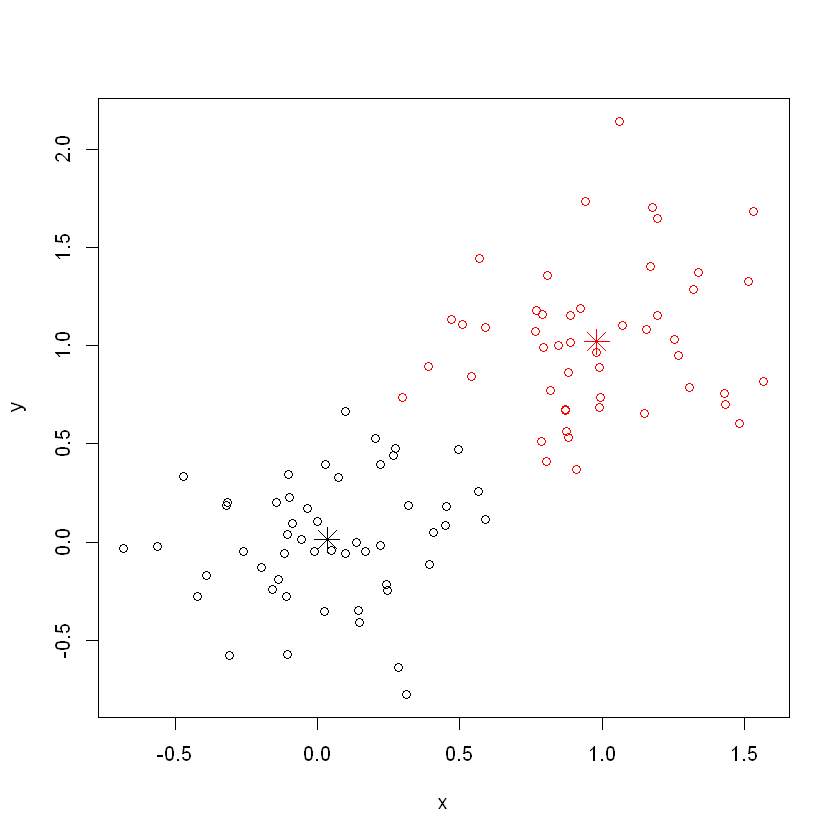

In [192]:
plot(x,col=cl$cluster)
points(cl$centers,col=1:2,pch=8,cex=2)

## DBSCAN

In [194]:
library(factoextra)

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [195]:
#data multishape in factoextra, fviz_cluster

In [196]:
data("multishapes")
str(multishapes)

'data.frame':	1100 obs. of  3 variables:
 $ x    : num  -0.804 0.853 0.927 -0.753 0.707 ...
 $ y    : num  -0.853 0.368 -0.275 -0.512 0.811 ...
 $ shape: num  1 1 1 1 1 1 1 1 1 1 ...


In [198]:
df<-multishapes[,1:2]

In [199]:
set.seed(123)

In [208]:
km.res<-kmeans(df,5,nstart=25)

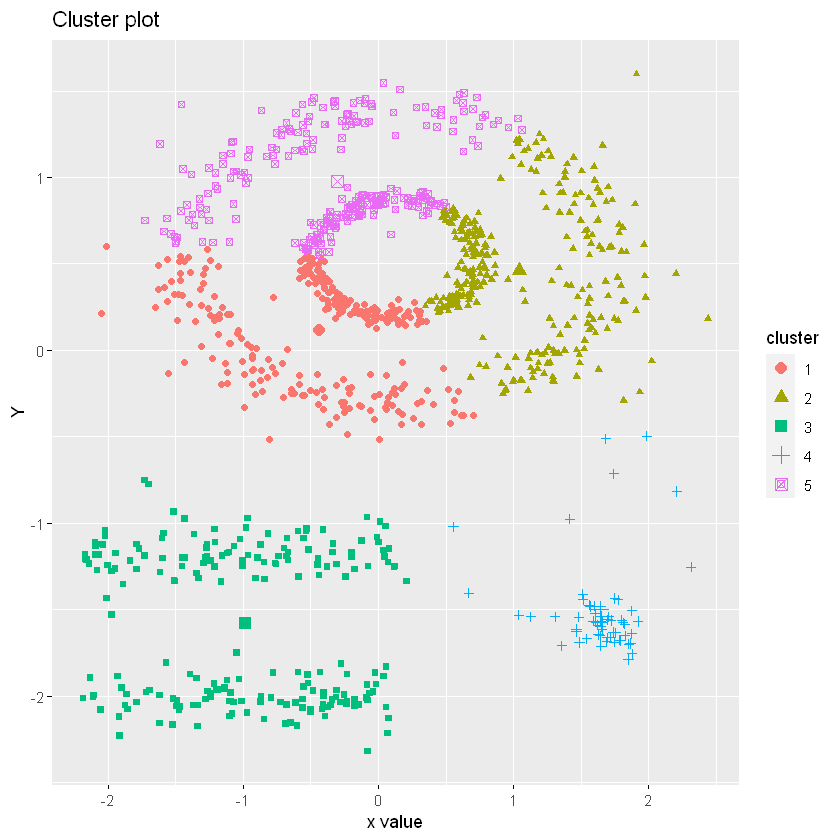

In [210]:
fviz_cluster(km.res,df,ellipse=FALSE,geom='point')+ylab("Y")

In [211]:
library(fpc)
library(dbscan)

Warning message:
"package 'fpc' was built under R version 3.6.3"
Attaching package: 'fpc'

The following object is masked from 'package:mda':

    confusion

Warning message:
"package 'dbscan' was built under R version 3.6.3"
Attaching package: 'dbscan'

The following object is masked from 'package:fpc':

    dbscan



In [212]:
db<-fpc::dbscan(df,eps=0.15,MinPts=5)

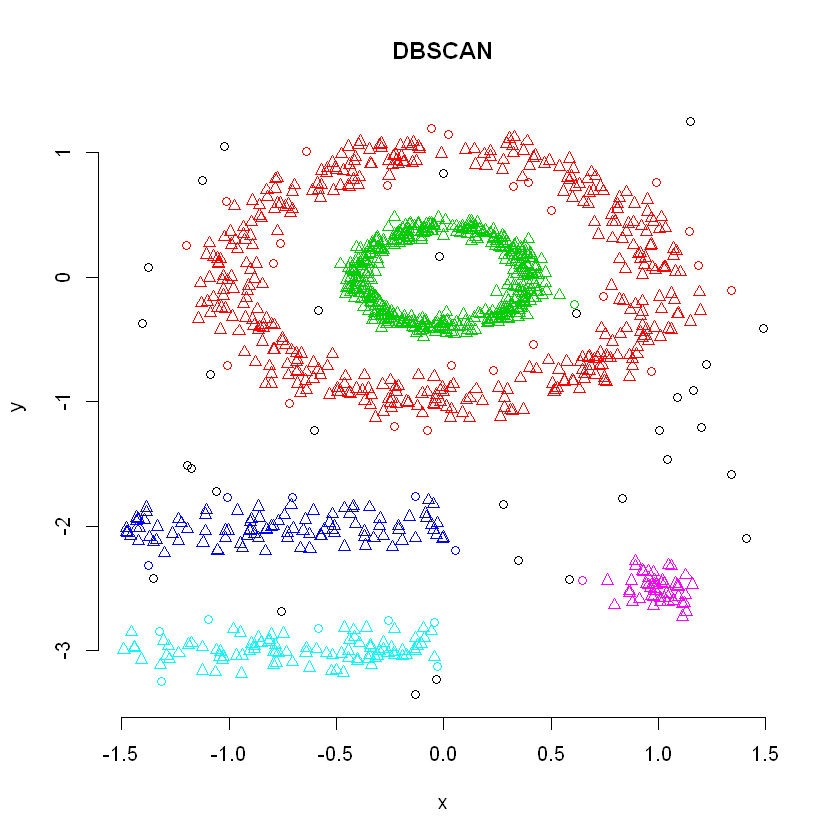

In [214]:
plot(db,df,main="DBSCAN",frame=FALSE)

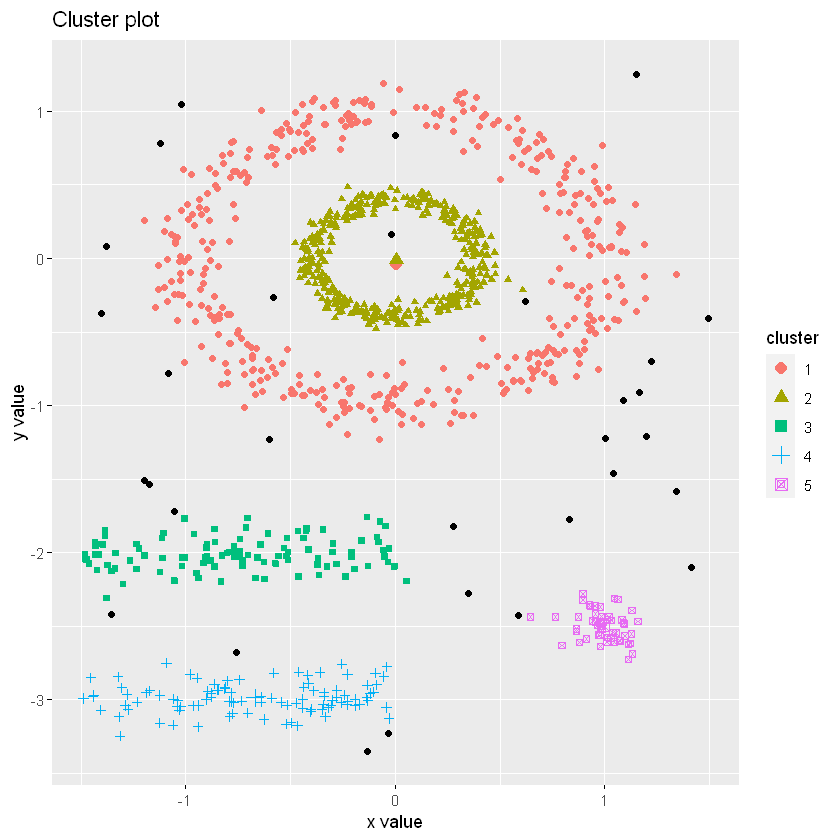

In [215]:
fviz_cluster(db,df,stand=FALSE,ellipse=FALSE,geom='point')

In [216]:
str(db)

List of 4
 $ cluster: num [1:1100] 1 1 1 1 1 1 1 1 1 1 ...
 $ eps    : num 0.15
 $ MinPts : num 5
 $ isseed : logi [1:1100] TRUE TRUE TRUE TRUE TRUE TRUE ...
 - attr(*, "class")= chr "dbscan"


In [217]:
## optimal eps value

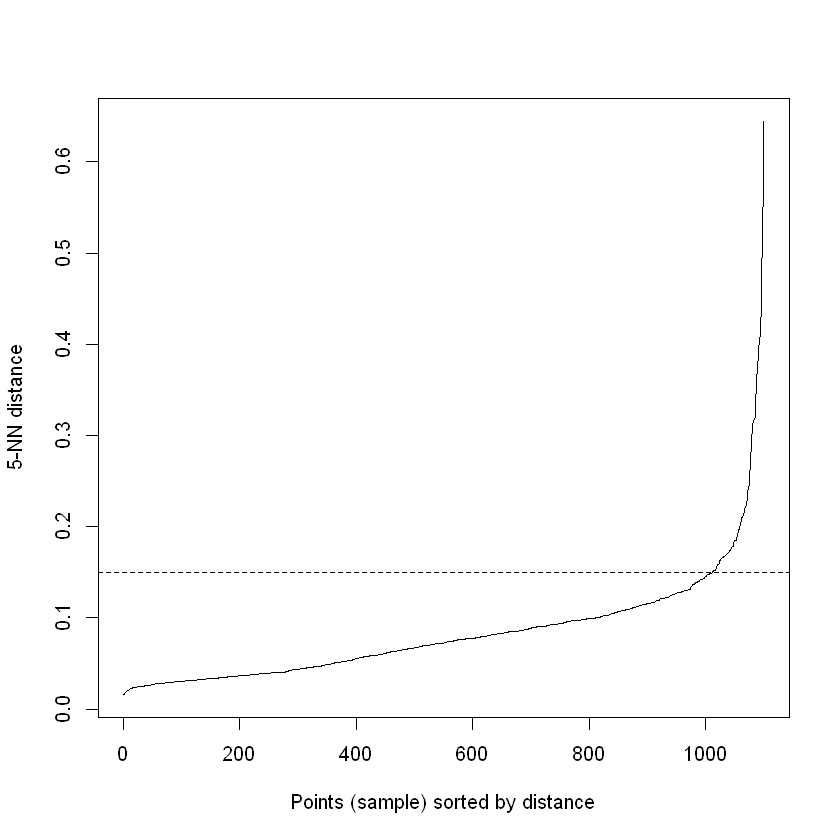

In [219]:
dbscan::kNNdistplot(df,k=5)
abline(h=0.15,lty=2) #eps around 0.15

In [220]:
#cluster prediction

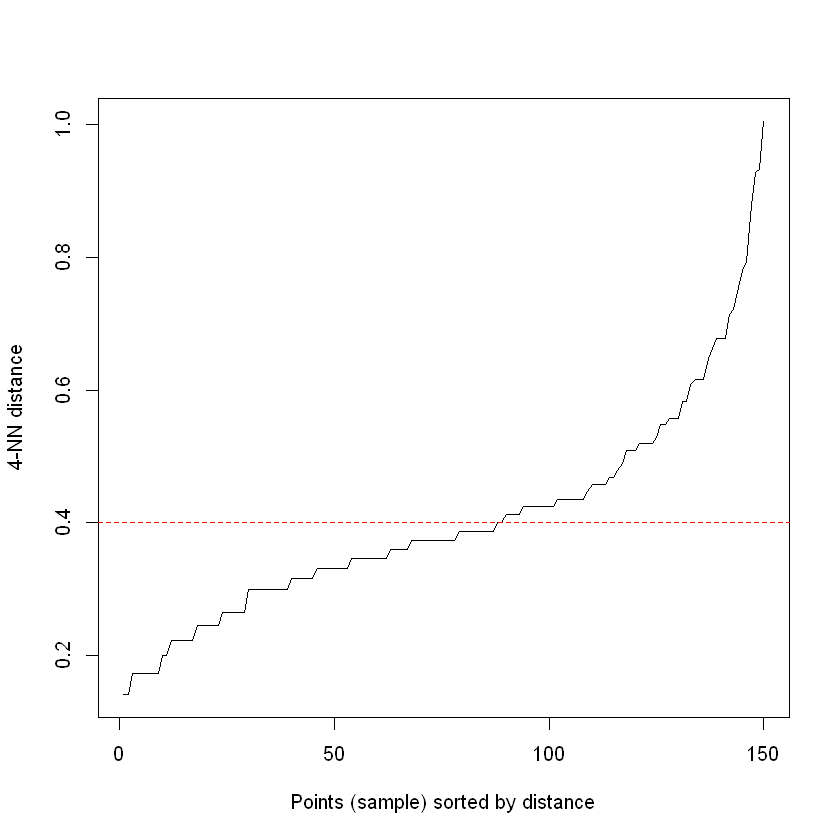

In [222]:
data('iris')
iris <- as.matrix(iris[,1:4])
dbscan::kNNdistplot(iris,k=4)
abline(h=0.4,lty=2,col='red')

In [225]:
set.seed(123)
res.fpc=fpc::dbscan(iris,eps=0.4,MinPts=4)
res.db <- dbscan::dbscan(iris,0.4,4)

In [227]:
str(res.db)

List of 3
 $ cluster: int [1:150] 1 1 1 1 1 1 1 1 1 1 ...
 $ eps    : num 0.4
 $ minPts : num 4
 - attr(*, "class")= chr [1:2] "dbscan_fast" "dbscan"


In [228]:
all(res.fpc$cluster==res.db$cluster)

[1] TRUE

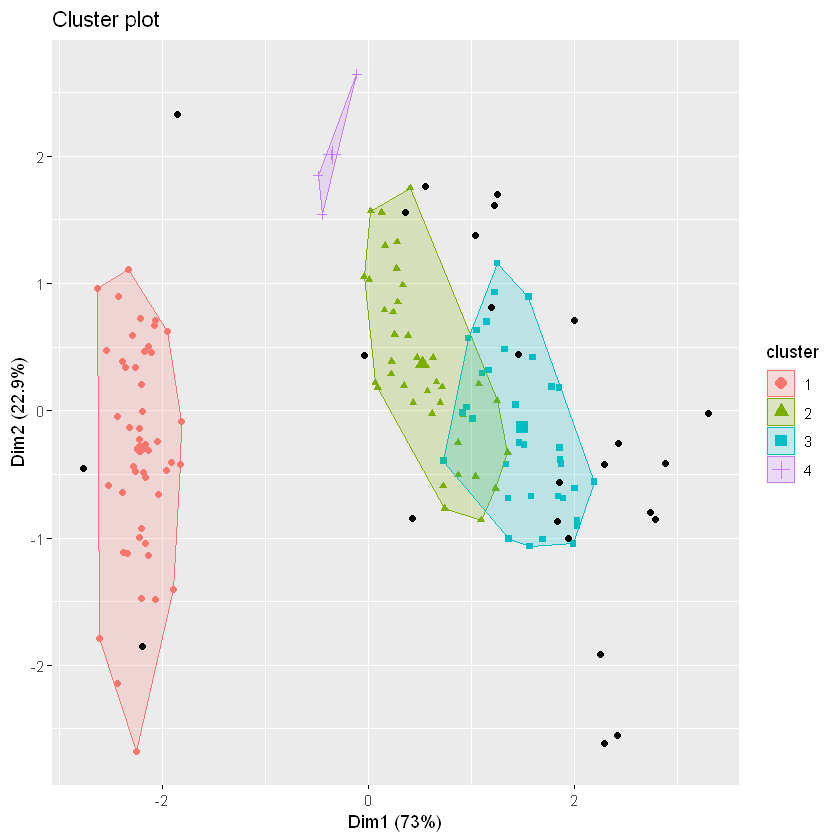

In [229]:
fviz_cluster(res.db,iris,geom='point')

# Random Forest (Ensemble)

In [231]:
# Biomarker data
library(randomForest)
library(MASS)
library(gbm) #generalized boosted model

Warning message:
"package 'gbm' was built under R version 3.6.3"Loaded gbm 2.1.5


In [232]:
data(iris)

In [233]:
iris.rf <- randomForest(Species~.,data=iris,importance=T,proximity=T)

In [234]:
print(iris.rf)


Call:
 randomForest(formula = Species ~ ., data = iris, importance = T,      proximity = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.67%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          4        46        0.08


In [235]:
str(iris.rf)

List of 19
 $ call           : language randomForest(formula = Species ~ ., data = iris, importance = T, proximity = T)
 $ type           : chr "classification"
 $ predicted      : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ err.rate       : num [1:500, 1:4] 0.0556 0.075 0.049 0.0496 0.0444 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "OOB" "setosa" "versicolor" "virginica"
 $ confusion      : num [1:3, 1:4] 50 0 0 0 47 4 0 3 46 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "setosa" "versicolor" "virginica"
  .. ..$ : chr [1:4] "setosa" "versicolor" "virginica" "class.error"
 $ votes          : 'matrix' num [1:150, 1:3] 1 0.995 1 1 1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:150] "1" "2" "3" "4" ...
  .. ..$ : chr [1:3] "setosa" "versicolor" "virginica"
 $ oob.times      : num [1:150] 203 198 168 186 174 177 188 192 188 178 ...
 $ classes 

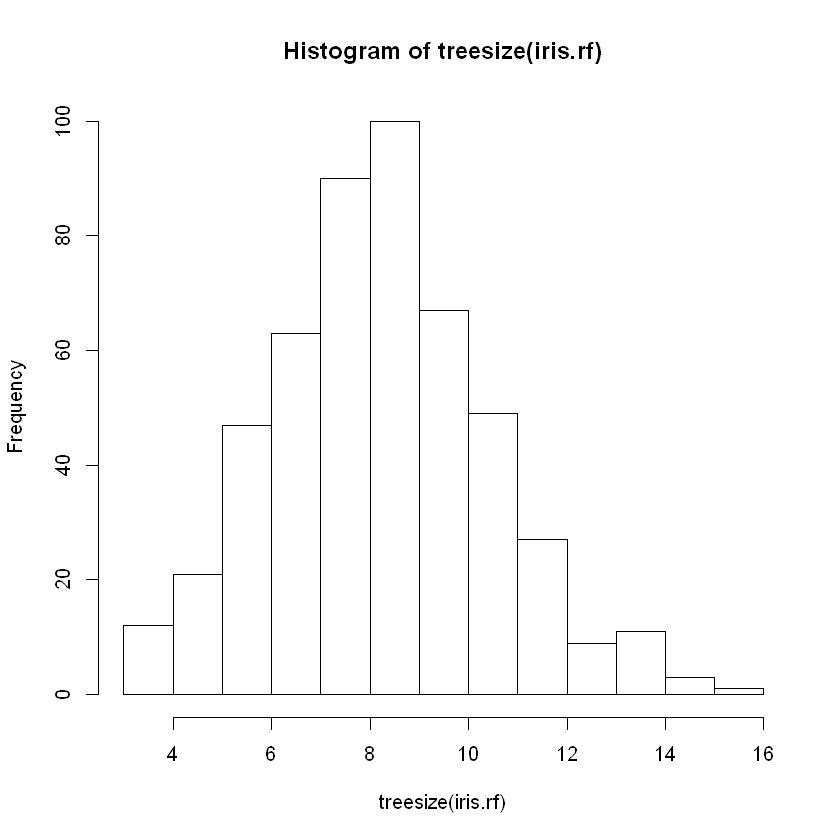

In [244]:
hist(treesize(iris.rf))

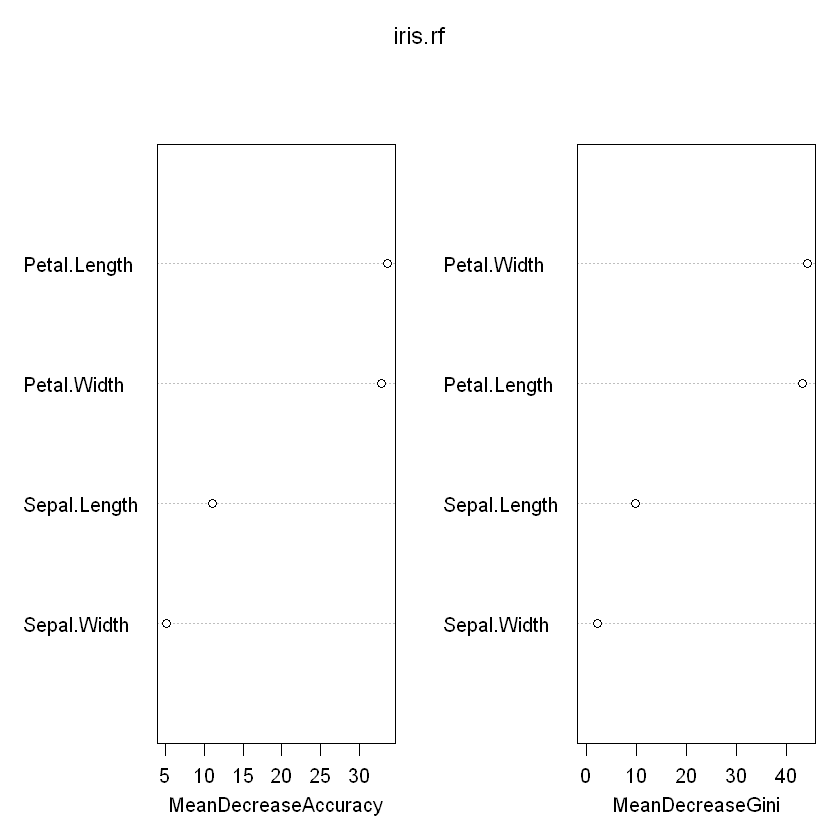

In [245]:
varImpPlot(iris.rf)

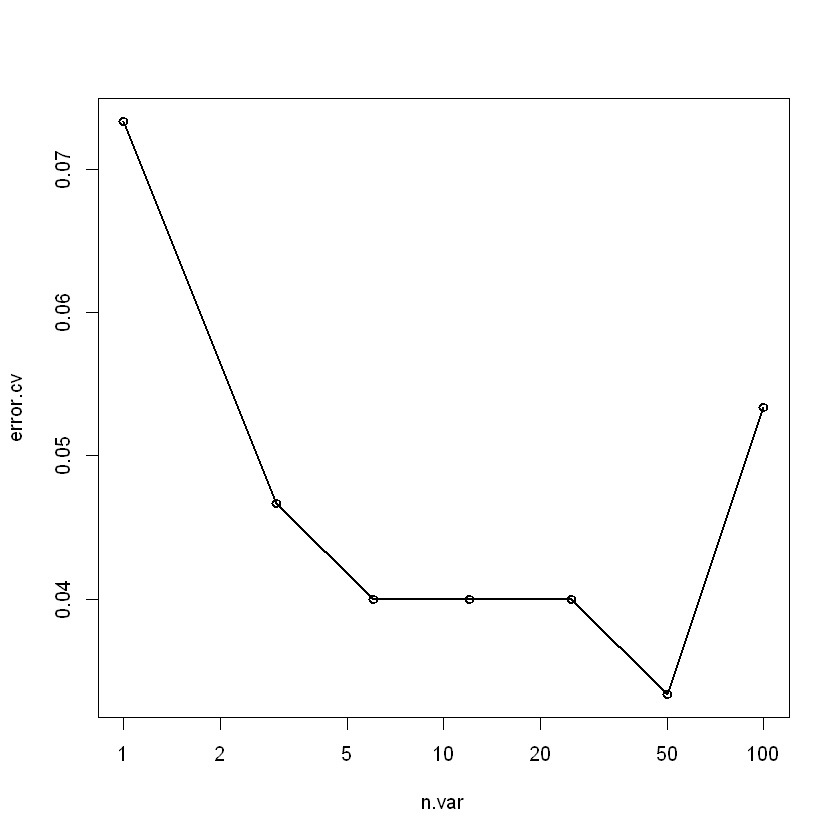

In [237]:
# Random forest cross validation for feature selection
myiris <- cbind(iris[1:4], matrix(runif(96 * nrow(iris)), nrow(iris), 96))
result <- rfcv(myiris, iris$Species, cv.fold=3)
with(result, plot(n.var, error.cv, log="x", type="o", lwd=2))

In [240]:
#Missing value imputation by randomForest
#Impute missing values in predictor data using proximity from randomForest
data(iris)
iris.na <- iris
set.seed(111)
## artificially drop some data values.
for (i in 1:4) iris.na[sample(150, sample(20)), i] <- NA

In [241]:
iris.na

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
NA,3.5,1.4,0.2,setosa
4.9,3.0,1.4,NA,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,NA,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [242]:
set.seed(222)
iris.imputed <- rfImpute(Species ~ ., iris.na)

ntree      OOB      1      2      3
  300:   6.00%  0.00%  8.00% 10.00%
ntree      OOB      1      2      3
  300:   4.67%  0.00%  6.00%  8.00%
ntree      OOB      1      2      3
  300:   5.33%  0.00%  6.00% 10.00%
ntree      OOB      1      2      3
  300:   5.33%  0.00%  6.00% 10.00%
ntree      OOB      1      2      3
  300:   6.00%  0.00%  8.00% 10.00%


In [243]:
iris.imputed

Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
setosa,5.001232,3.5,1.400000,0.2000000
setosa,4.900000,3.0,1.400000,0.2477916
setosa,4.700000,3.2,1.300000,0.2000000
setosa,4.600000,3.1,1.500000,0.2000000
setosa,5.000000,3.6,1.400000,0.2000000
setosa,5.400000,3.9,1.464408,0.4000000
setosa,4.600000,3.4,1.400000,0.3000000
setosa,5.000000,3.4,1.500000,0.2000000
setosa,4.400000,2.9,1.400000,0.2000000
setosa,4.900000,3.1,1.500000,0.1000000


In [ ]:
set.seed(333)
iris.rf <- randomForest(Species ~ ., iris.imputed)
print(iris.rf)

# Feature Selection

In [248]:
library(FSelector)

Warning message:
"package 'FSelector' was built under R version 3.6.3"

In [249]:
data(iris)
weights = information.gain(Species ~.,iris)

In [253]:
str(weights)

'data.frame':	4 obs. of  1 variable:
 $ attr_importance: num  0.452 0.267 0.94 0.955


In [257]:
library(tidyverse)
weights %>% mutate(name=rownames(weights)) %>% arrange(desc(attr_importance))

attr_importance,name
0.9554360,Petal.Width
0.9402853,Petal.Length
0.4521286,Sepal.Length
0.2672750,Sepal.Width
